In [1]:
library(Seurat, quietly = TRUE)
library(SeuratData, quietly = TRUE)
library(SeuratDisk, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(ArchR, quietly = TRUE)

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

In [2]:
## load metadata
proj <- loadArchRProject(path = "../snATAC/DataIntegration/data/VisiumHeart", showLogo = FALSE)

Successfully loaded ArchRProject!



In [3]:
## get a Seurat object for ATAC-seq
geneMatrix <- getMatrixFromProject(proj, useMatrix = "GeneScoreMatrix")
GeneScoreMatrix <- geneMatrix@assays@data$GeneScoreMatrix
rownames(GeneScoreMatrix) <- geneMatrix@elementMetadata$name

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-3b13bb72e4e1e9-Date-2021-11-04_Time-16-22-53.log
If there is an issue, please report to github with logFile!

2021-11-04 16:28:53 : Organizing colData, 6.011 mins elapsed.

2021-11-04 16:28:54 : Organizing rowData, 6.017 mins elapsed.

2021-11-04 16:28:54 : Organizing rowRanges, 6.017 mins elapsed.

2021-11-04 16:28:54 : Organizing Assays (1 of 1), 6.017 mins elapsed.

2021-11-04 16:31:38 : Constructing SummarizedExperiment, 8.746 mins elapsed.

2021-11-04 16:31:39 : Finished Matrix Creation, 8.765 mins elapsed.



In [4]:
# load Seurat object
obj <- readRDS("../snATAC/DataIntegration/data/VisiumHeart/snATAC.annotated.Rds")

In [5]:
meta.data <- obj@meta.data
head(meta.data)

,orig.ident,nCount_peaks,nFeature_peaks,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,⋯,seurat_clusters,cell_type,condition,region,patient_group,global_id,rep,patient,region_novel,patient_id
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CK171#AGGCGTCCACCATTCC-1,CK171,62095,34713,CK171,6.245,14669,18011,1136,0.09025808,1,⋯,15,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
CK171#TGATCAGAGGTAAGTT-1,CK171,90454,46242,CK171,8.331,24600,26536,912,0.13673276,1,⋯,3,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
CK171#TAGCATGCAAGTCTCA-1,CK171,73832,39097,CK171,9.020,21378,23169,1163,0.12278870,1,⋯,15,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
CK171#TACATTCCAAACCTAC-1,CK171,90941,46789,CK171,8.800,23434,25827,912,0.13702053,1,⋯,3,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
CK171#CACCACTGTCGCTAGC-1,CK171,76195,40207,CK171,9.127,21954,23478,1032,0.12531759,1,⋯,15,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2
CK171#GTCACCTAGGAAGGTA-1,CK171,79884,42256,CK171,8.614,22565,25028,956,0.13525286,1,⋯,15,CM,not_defined,BZ,group_1,AKK003 No4 borderzone,1,P2,RZ/BZ,RZ/BZ_P2


In [6]:
meta.data <- meta.data[, c("Sample", "cell_type")]

In [7]:
meta.data$cell_type <- as.character(meta.data$cell_type)

In [8]:
counts <- GeneScoreMatrix[, rownames(meta.data)]

In [9]:
dim(counts)

[1] 24919 46086

In [10]:
obj.atac <- CreateSeuratObject(counts = counts,
                               meta.data = meta.data,
                               assay = "RNA",
                              names.delim = "-") %>% 
            NormalizeData()

head(obj.atac@meta.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


,orig.ident,nCount_RNA,nFeature_RNA,Sample,cell_type
,<fct>,<dbl>,<int>,<chr>,<chr>
CK171#AGGCGTCCACCATTCC-1,SeuratProject,10000.003,21275,CK171,CM
CK171#TGATCAGAGGTAAGTT-1,SeuratProject,10000.021,20991,CK171,CM
CK171#TAGCATGCAAGTCTCA-1,SeuratProject,9999.971,21083,CK171,CM
CK171#TACATTCCAAACCTAC-1,SeuratProject,9999.961,20742,CK171,CM
CK171#CACCACTGTCGCTAGC-1,SeuratProject,10000.007,21186,CK171,CM
CK171#GTCACCTAGGAAGGTA-1,SeuratProject,10000.111,21195,CK171,CM


In [11]:
umap_embedding <- Embeddings(obj, reduction = "umap_harmony_v2")
rownames(umap_embedding) <- colnames(obj.atac)
colnames(umap_embedding) <- c("UMAP_1", "UMAP_2")
head(umap_embedding)

,UMAP_1,UMAP_2
CK171#AGGCGTCCACCATTCC-1,-3.609075,-1.9669043
CK171#TGATCAGAGGTAAGTT-1,-6.489815,0.3751234
CK171#TAGCATGCAAGTCTCA-1,-4.828056,0.7782132
CK171#TACATTCCAAACCTAC-1,-7.681391,-0.7186383
CK171#CACCACTGTCGCTAGC-1,-4.143128,0.3801122
CK171#GTCACCTAGGAAGGTA-1,-1.753949,0.4684851


In [12]:
obj.atac[["umap"]] <- CreateDimReducObject(embeddings = umap_embedding, key = "UMAP_", assay = DefaultAssay(obj.atac))

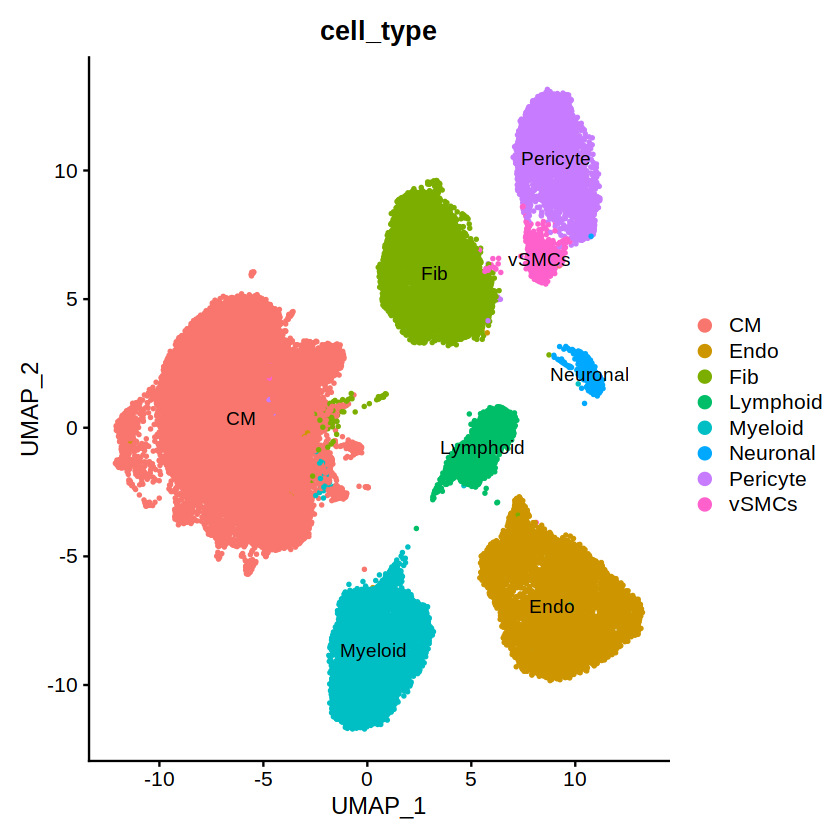

In [13]:
DimPlot(obj.atac, reduction = "umap", pt.size = 0.5, group.by = "cell_type", label = TRUE)

In [14]:
SaveH5Seurat(obj.atac, filename = "snATAC-seq.h5Seurat")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap



In [15]:
Convert("snATAC-seq.h5Seurat", dest = "h5ad")

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs

Adding dimensional reduction information for umap

